In [2]:
%pylab inline
import numpy as np
import Pk_library as PKL

Populating the interactive namespace from numpy and matplotlib


In [52]:
delta1 = np.load('/mnt/projects/bias_mock/galaxies/smoothed_fields/PL/galpos_RedSample_5e-04_5.npy')
delta2 = np.load('/mnt/projects/bias_mock/galaxies/smoothed_fields/PL/rhogal_5e-04_eul_bias_gaus_5.npy')

In [53]:
np.mean(delta1/delta2)

1.371876

In [42]:

# correlation function parameters
BoxSize = 1440.0 #Mpc/h
MAS     = 'CIC'
axis    = 0
threads = 16

# compute the correlation function
CF1     = PKL.Xi(delta1, BoxSize, MAS, axis, threads)
CF2     = PKL.Xi(delta2, BoxSize, MAS, axis, threads)

# get the attributes
r_1      = CF1.r3D      #radii in Mpc/h
xi0_1    = CF1.xi[:,0]  #correlation function (monopole)
xi2_1    = CF1.xi[:,1]  #correlation function (quadrupole)

r_2      = CF2.r3D      #radii in Mpc/h
xi0_2    = CF2.xi[:,0]  #correlation function (monopole)
xi2_2    = CF2.xi[:,1]  #correlation function (quadrupole)


Computing correlation function of the field...
Time to complete loop = 2.63
Time taken = 10.69 seconds

Computing correlation function of the field...
Time to complete loop = 2.62
Time taken = 10.51 seconds


[]

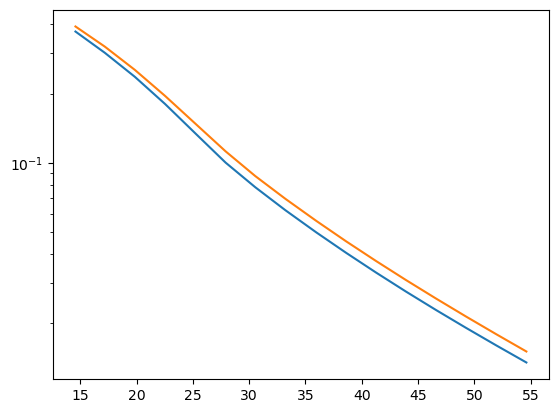

In [43]:
plt.plot(r_1[4:20],xi0_1[4:20])
plt.plot(r_2[4:20],xi0_2[4:20])
plt.semilogy()

In [16]:
import h5py
import MAS_library as MASL
import smoothing_library as SL

masa = '5e-04'
path = '/mnt/projects/bias_mock/galaxies/'
filename = 'galpos_RedSample_'+masa
file = h5py.File(path+filename+'.hdf5','r')
pos = file['Subhalo/SubhaloPos'][()]
fbines = 540
BoxSize = 1440.0 #Mpc/h ; size of box
MAS     = 'CIC'  #mass-assigment scheme
Filter = 'Top-Hat'
threads = 10

In [18]:
pos = pos.astype(np.float32)
# compute the field
delta = np.zeros((fbines,fbines,fbines), dtype=np.float32)
MASL.MA(pos, delta, BoxSize, MAS, verbose=False)
# transformo a campo de contraste densidad
delta /= np.mean(delta, dtype=np.float32);  delta -= 1.0

In [19]:
CF     = PKL.Xi(delta, BoxSize, MAS, axis, threads)


Computing correlation function of the field...
Time to complete loop = 2.63
Time taken = 11.50 seconds


In [20]:
r      = CF.r3D      #radii in Mpc/h
xi0    = CF.xi[:,0]  #correlation function (monopole)
xi2    = CF.xi[:,1]  #correlation function (quadrupole)

[]

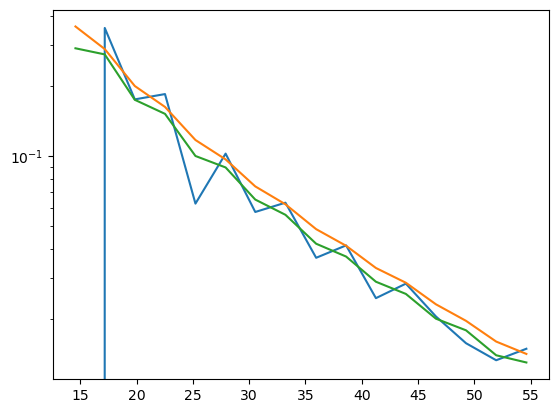

In [22]:
plt.plot(r_1[4:20],xi0_1[4:20],label='exp')
plt.plot(r_2[4:20],xi0_2[4:20],label='sim ngp')
plt.plot(r[4:20],xi0[4:20],label='sim cic')
plt.semilogy()

In [27]:
SL.field_smoothing

<function smoothing_library.smoothing_library.field_smoothing>